<!DOCTYPE html>
<html>
<body>
    <h1 style="text-align: center;">
        <strong>⚛️Explicable AI: Superconductivity data</strong>
    </h1>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
    <h3 style="text-align: center;">
     🤖 <strong> Explainable Boosting Machines (EBM) </strong>
    </h3>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>📚Importing Libraries & Data</strong>
    </h3>
</body>
</html>

In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from interpret import show
from interpret.glassbox import ExplainableBoostingRegressor
from interpret.data import Marginal
from interpret.perf import RegressionPerf

In [2]:
df = pd.read_csv("dataset_supercondutividade.csv")
X = df.drop(["critical_temp"], axis=1)
y = df["critical_temp"]
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.9, random_state=1702)

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong> 🏋🏻Training a EBM</strong>
    </h3>
</body>
</html>

One of the most promisors Generalized Additive Model (GAM), Explainable Boosting Machines (EBMs), is a model known because of its high accuracy (like other ensemble models) and high interpretability (as usual glassbox models). Different from the usual GAMs, which use the features individually (and consequently, are interpretable models, because of the analysis of dependence plot), EBMs can capture some features interaction, by also using a pair of features on the additive terms [1] :

$$
g(E(Y)) = \beta_0 + \sum f_i (x_i)  + \sum f_ij(x_i, x_j)
$$

Matching the best of both worlds, EBMs (Explainable Boosting Machines) are known as an outlier in the traditional performance vs. interpretability trade-off. They offer an interpretable and high-performing model by combining the strengths of boosted trees and bagging, while maintaining the transparency of generalized additive models (GAMs). The training process can be splited in two mainly parts:

<ul>

1. Boosting: Instead of training deep decision trees, EBMs train many small trees, one for each feature. But, different from regular boosting, where each tree corrects the mistakes of the previous one, EBMs train trees in rounds, going through each feature one by one multiple times and, by that, ensuring the adding characteristic of GAMs models.

2. Discretization: Once all the small trees are trained, the algorithm simplify them. Instead of using the trees directly, they create a graph that store how each feature affects the prediction. By that, it is possible to make the predictions.

<ul>

To training a EBM model, it is possible to use the ``interpret`` module. Besides the algorithm for EBM induction, this library also made some results analysis.

By example, before the training, a data exploratory analysis can be made, using this tool. It contains things like Pearson Correlation coefficient and data distribution. (In general e for each feature).

In [3]:
marginal = Marginal().explain_data(X_train, y_train, name='Data')
show(marginal)

<!-- http://127.0.0.1:7001/2542603285328/ -->

* In a nutshell, the behavior of the data is close the observed in the other data analyses. However, it´s interesting to note that all the features were considered continuous, although  the atomic number is a discrete variable.

Now, let´s train the model!

In [9]:
ebm_model = ExplainableBoostingRegressor()
ebm_model.fit(X_train, y_train)

ExplainableBoostingRegressor()

***

In [11]:
# Saving the model
import pickle
with open("ebm_model.pkl", "wb") as ebm:
    pickle.dump(ebm_model, ebm)
    ebm.close()

***

In [14]:
y_predicted = ebm_model.predict(X_test)

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong> 🧪Analysis of the results </strong>
    </h3>
</body>
</html>

It is possible to analyse the results by using Root Mean Squared Error (RMSE) metric.

In [16]:
def rmse(y_test, y_predicted): 
    rmse_sum = 0
    for i, j in zip(y_test, y_predicted):
        rmse_sum += (j - i)**2
    return (rmse_sum / len(y_test))**(1/2)

In [19]:
print(f"The EBM RMSE is {rmse(y_test, y_predicted)}")

The EBM RMSE is 10.128858312284015


* It is the lower value until now!

With the real values and predicted values, it is possible to plot them to make a visual analyse of the result.

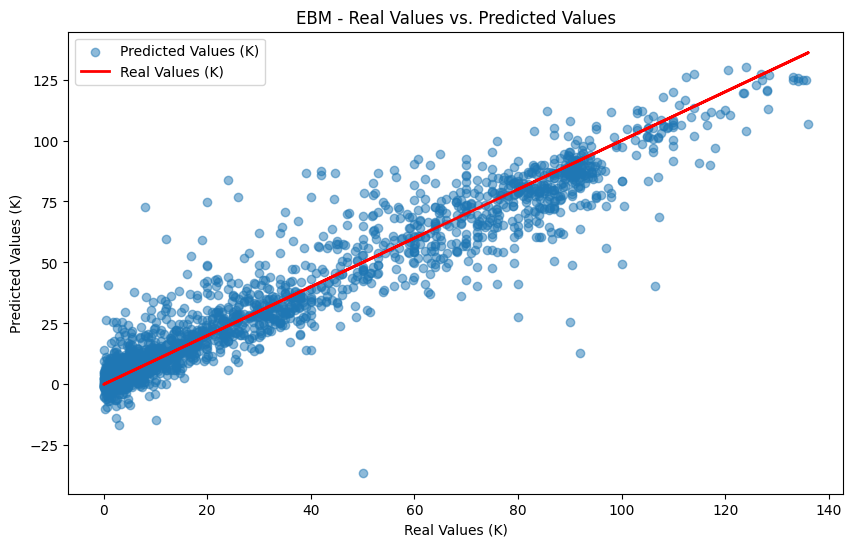

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, alpha=0.5, label='Predicted Values (K)')

plt.plot(y_test, y_test, color='red', label='Real Values (K)', linewidth=2)

plt.title('EBM - Real Values vs. Predicted Values')
plt.xlabel('Real Values (K)')
plt.ylabel('Predicted Values (K)')
plt.legend()
plt.show()

* The predicted values do not apresented any clear pattern (which indicate that the model is not overfitting) and they are close to the real values line. So it possible to think the predictions are close to the original column values. But some outliers could be identified and the model predicted negative values - something that do not occur in reality. 

In [12]:
performance_int = RegressionPerf(ebm_model).explain_perf(
    X, y, name="Performance"
)
show(performance_int)

<!-- http://127.0.0.1:7001/2542615684624/ -->

* The RMSE is based on the train values (so the result is different from the made with RMSE function!)

Like SHAP module, the EBM models can make partial dependence plots for each feature.

In [21]:
show(ebm_model.explain_global())

<!-- http://127.0.0.1:7001/2540534140624/ -->

* As happened with SHAP results, the "range_ThermalConductivity" feature was considered the most important one! Features related to other properties, as density, atomic radius, valence and first ionization energy,  were also considered as important ones.

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong> 📚References </strong>
    </h3>
</body>
</html>

[1] Picard, Romain. “Performance And Explainability With EBM”. Towards Data Science, 13 de abril de 2021, https://towardsdatascience.com/performance-and-explainability-with-ebm-c5d363e5f82/.

[2] Barak, Noga Gershon. “InterpretML: Another Way to Explain Your Model”. Towards Data Science, 17 de novembro de 2021, https://towardsdatascience.com/interpretml-another-way-to-explain-your-model-b7faf0a384f8/.